<a href="https://colab.research.google.com/github/rafles19/HandsOnDataScience_Newbie/blob/main/Bab3_EDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


***Ambil data dari google drive***

In [8]:

path = '/content/drive/MyDrive/Buku-Machine-Learning-main/data_car.csv'
df = pd.read_csv(path)

In [9]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

***Menghapus fitur fitur yang belum terlalu digunakan pada kasus ini***

In [11]:
df = df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity","Number of Doors", "Vehicle Size"], axis=1)

***Mengganti nama fitur menjadi lebih baik untuk dibaca***

In [12]:
df = df.rename(columns={"Make": "Perusahaan", "Year" : "Tahun", "Engine HP" : "Tenaga Mesin", "Engine Cylinders" : "Silinder Mesin", "Transmission Type" : "Jenis Transmisi", "Driven_Wheels" : "Roda", "highway MPG" : "Konsumsi BBM TOL", "city mpg" : "Konsumsi BBM KOTA", "MSRP" : "Harga"})

In [13]:
df.head()

,Perusahaan,Model,Tahun,Tenaga Mesin,Silinder Mesin,Jenis Transmisi,Roda,Konsumsi BBM TOL,Konsumsi BBM KOTA,Harga
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


***Melihat dimensi persebaran data***



In [14]:
df.shape

(11914, 10)

Melihat Baris dan kolom yang duplikat pada dataset

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated Rows : ", duplicate_rows_df.shape)

Number of duplicated Rows :  (989, 10)


***Hitung terlebih dahulu jumlah data diseluruh baris***

In [16]:
df.count()

Perusahaan           11914
Model                11914
Tahun                11914
Tenaga Mesin         11845
Silinder Mesin       11884
Jenis Transmisi      11914
Roda                 11914
Konsumsi BBM TOL     11914
Konsumsi BBM KOTA    11914
Harga                11914
dtype: int64

In [17]:
df =  df.drop_duplicates()

In [18]:
df.head(5)

,Perusahaan,Model,Tahun,Tenaga Mesin,Silinder Mesin,Jenis Transmisi,Roda,Konsumsi BBM TOL,Konsumsi BBM KOTA,Harga
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


***Melihat Perusahaan yang sudah banyak memproduksi mobil terbanyak***

In [56]:
total_perusahaan = df.groupby('Perusahaan').size().sort_values(ascending=False)
top_10_perusahaan = total_perusahaan.head(10)
print(top_10_perusahaan)


Perusahaan
Chevrolet     1043
Ford           798
Toyota         651
Volkswagen     563
Nissan         540
Dodge          513
GMC            475
Honda          429
Cadillac       396
Mazda          392
dtype: int64


Meliat total produksi mobil tiap perusahaan pertahun

In [54]:
total_produksi_perusahaan_per_tahun = df.groupby(['Perusahaan', 'Model', 'Tahun']).size().reset_index(name='Jumlah_Produksi')
print(total_produksi_perusahaan_per_tahun)

     Perusahaan Model  Tahun  Jumlah_Produksi
0         Acura    CL   2001                2
1         Acura    CL   2002                2
2         Acura    CL   2003                5
3         Acura   ILX   2015                4
4         Acura   ILX   2016                6
...         ...   ...    ...              ...
2419      Volvo  XC70   2015                6
2420      Volvo  XC70   2016               10
2421      Volvo  XC90   2014                2
2422      Volvo  XC90   2016               10
2423      Volvo  XC90   2017                5

[2424 rows x 4 columns]


Melihat jumlah produksi mobil BMW per tahun

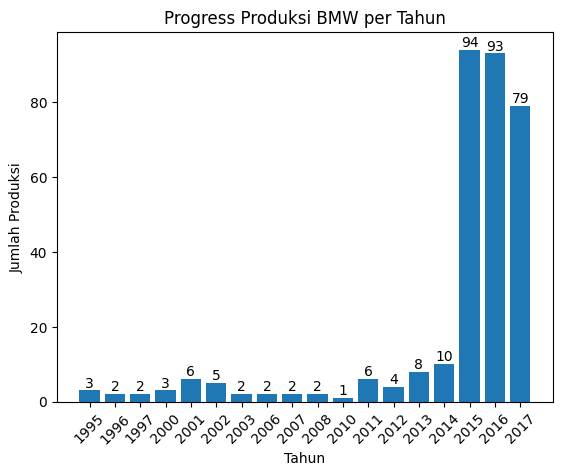

In [80]:
# Menghitung jumlah produksi BMW per tahun
produksi_bmw_per_tahun = df[df['Perusahaan'] == 'BMW'].groupby('Tahun')['Model'].count()

# Plotting bar chart untuk visualisasi progress produksi BMW per tahun
x = np.arange(len(produksi_bmw_per_tahun))  # Menghasilkan array posisi x
plt.bar(x, produksi_bmw_per_tahun.values)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi')
plt.title('Progress Produksi BMW per Tahun')

# Menambahkan teks jumlah produksi di dalam setiap bar
for i, v in enumerate(produksi_bmw_per_tahun.values):
    plt.text(x[i], v, str(v), ha='center', va='bottom')

# Mengatur label sumbu x dengan tahun yang sesuai
plt.xticks(x, produksi_bmw_per_tahun.index,rotation=45)

plt.show()

Melihat jumlah produksi mobil Chevrolet per tahun

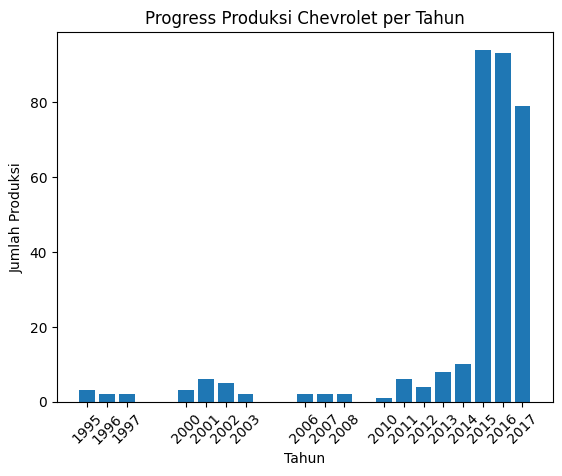

In [81]:
# Menghitung jumlah produksi Chevroler per tahun
produksi_bmw_per_tahun = df[df['Perusahaan'] == 'BMW'].groupby('Tahun')['Model'].count()

# Plotting bar chart untuk visualisasi progress produksi Chevrolet per tahun
plt.bar(produksi_bmw_per_tahun.index, produksi_bmw_per_tahun.values)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi')
plt.title('Progress Produksi Chevrolet per Tahun')
plt.xticks(produksi_bmw_per_tahun.index, rotation=45)
plt.show()


In [21]:
df.count()

Perusahaan           10925
Model                10925
Tahun                10925
Tenaga Mesin         10856
Silinder Mesin       10895
Jenis Transmisi      10925
Roda                 10925
Konsumsi BBM TOL     10925
Konsumsi BBM KOTA    10925
Harga                10925
dtype: int64

In [22]:
print(df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Perusahaan  Model  Tahun  Tenaga Mesin  Silinder Mesin  \
0           False  False  False         False           False   
1           False  False  False         False           False   
2           False  False  False         False           False   
3           False  False  False         False           False   
4           False  False  False         False           False   
...           ...    ...    ...           ...             ...   
11909       False  False  False         False           False   
11910       False  False  False         False           False   
11911       False  False  False         False           False   
11912       False  False  False         False           False   
11913       False  False  False         False           False   

       Jenis Transmisi   Roda  Konsumsi BBM TOL  Konsumsi BBM KOTA  Harga  
0                False  False             False              False  False  
1    

In [23]:
df = df.dropna()

In [24]:
df.count()

Perusahaan           10827
Model                10827
Tahun                10827
Tenaga Mesin         10827
Silinder Mesin       10827
Jenis Transmisi      10827
Roda                 10827
Konsumsi BBM TOL     10827
Konsumsi BBM KOTA    10827
Harga                10827
dtype: int64

In [25]:
print(df.isnull().sum())

Perusahaan           0
Model                0
Tahun                0
Tenaga Mesin         0
Silinder Mesin       0
Jenis Transmisi      0
Roda                 0
Konsumsi BBM TOL     0
Konsumsi BBM KOTA    0
Harga                0
dtype: int64


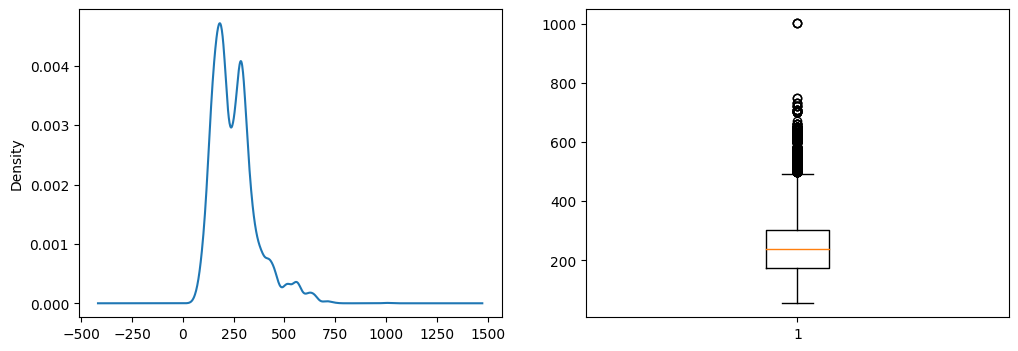

In [26]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Tenaga Mesin'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Tenaga Mesin'])
plt.show()

<Axes: xlabel='Tenaga Mesin'>

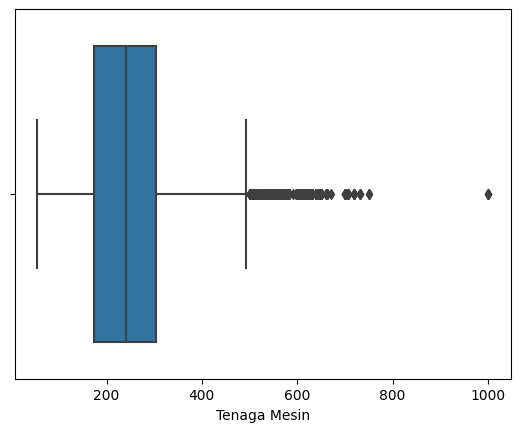

In [27]:
sns.boxplot(x=df['Tenaga Mesin'])

In [28]:
df.Harga.describe()

count    1.082700e+04
mean     4.249325e+04
std      6.229451e+04
min      2.000000e+03
25%      2.197250e+04
50%      3.084500e+04
75%      4.330000e+04
max      2.065902e+06
Name: Harga, dtype: float64

In [29]:
df['Harga'].min()

2000

Text(0.5, 0, 'Make')

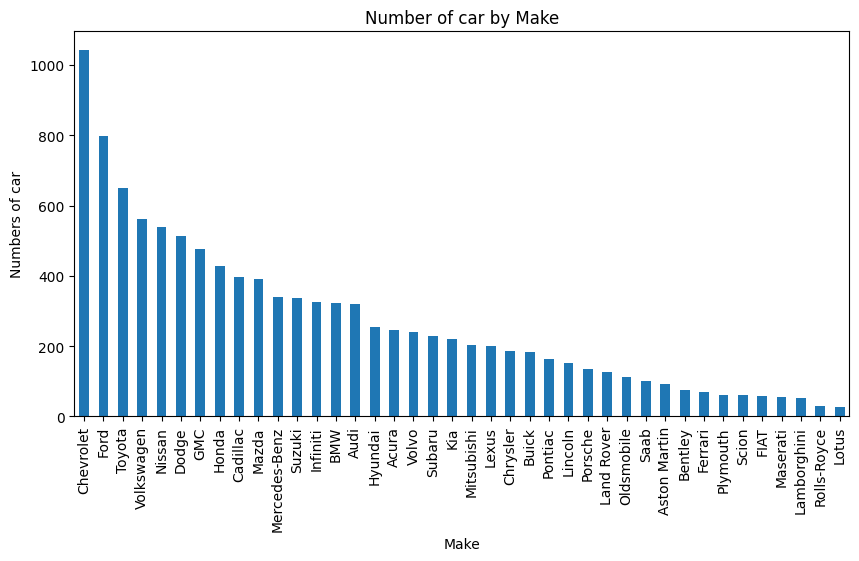

In [30]:
df.Perusahaan.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of car by Make")
plt.ylabel("Numbers of car")
plt.xlabel("Make")

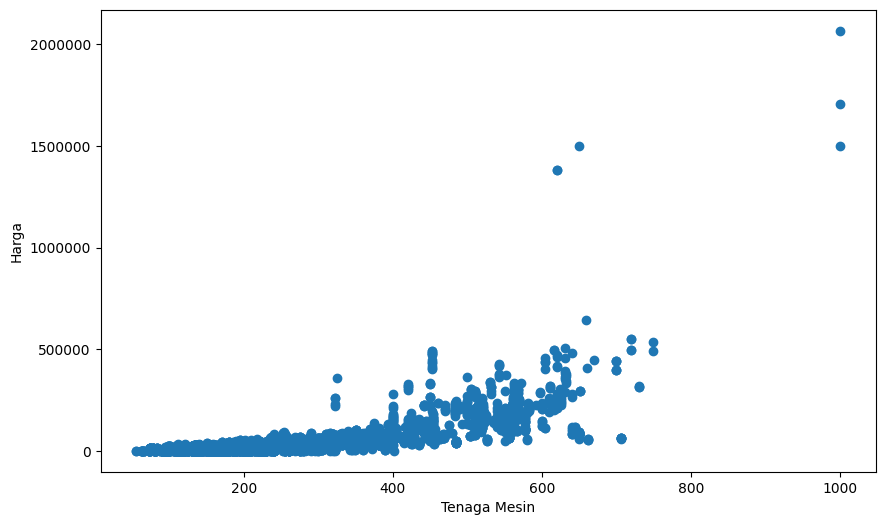

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Tenaga Mesin'], df['Harga'])
ax.set_xlabel('Tenaga Mesin')
ax.set_ylabel('Harga')
ax.ticklabel_format(style='plain')
plt.show()

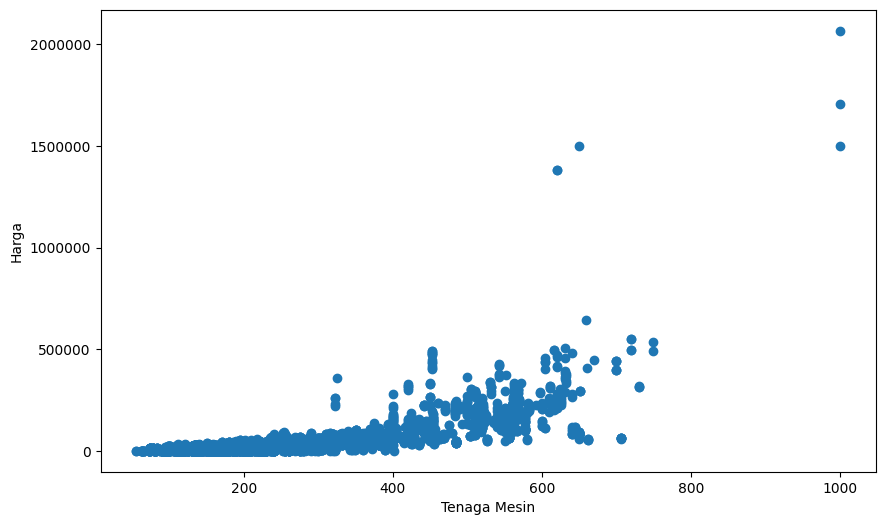

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Tenaga Mesin'], df['Harga'])
ax.set_xlabel('Tenaga Mesin')
ax.set_ylabel('Harga')
ax.ticklabel_format(style='plain')
plt.show()